# Import Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import *
import time
import numpy as np

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, f_classif

from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV

# Read Data

In [9]:
url = 'https://raw.githubusercontent.com/Hesam-Rashidi/Kikoites/main/raw_data_v2.csv'

# raw_data = pd.read_csv(r'D:\University\UofT\PhD\Semester 1\CME538-DS\Project 2\raw_data_v2.csv')
raw_data = df = pd.read_csv(url)
raw_data['Location'] = raw_data['Location'].str.lower()
raw_data.head()

,Location,Temperature (C ),pH,Conductivity (uS/cm),DO mg/L,DO %,Average PO,Time,year,month,day,hour,minutes,Description
0,gull bay (6m),18.8,7.26,68.1,7.73,84.1,0.027,2:00:00 PM,2019,8,5,14,0,sunny
1,gull bay (12m),9.0,6.89,55.1,9.29,81.3,0.027,2:00:00 PM,2019,8,5,14,0,sunny
2,gull bay (15m),7.8,6.91,54.3,11.56,96.2,0.020,2:00:00 PM,2019,8,5,14,0,sunny
3,gull river (0m),24.2,7.58,74.4,6.92,87.7,0.020,2:00:00 PM,2019,8,5,14,0,sunny
4,gull bay (1m),24.3,7.35,71.5,5.37,64.3,0.033,2:00:00 PM,2019,8,5,14,0,sunny


In [10]:
# Build the target variable
# equal to 1 if the lake is eutrophic, 0 otherwise

raw_data['Eutro'] = (raw_data['Average PO'] >= 35*10**-3).astype(int)
raw_data.head()

,Location,Temperature (C ),pH,Conductivity (uS/cm),DO mg/L,DO %,Average PO,Time,year,month,day,hour,minutes,Description,Eutro
0,gull bay (6m),18.8,7.26,68.1,7.73,84.1,0.027,2:00:00 PM,2019,8,5,14,0,sunny,0
1,gull bay (12m),9.0,6.89,55.1,9.29,81.3,0.027,2:00:00 PM,2019,8,5,14,0,sunny,0
2,gull bay (15m),7.8,6.91,54.3,11.56,96.2,0.020,2:00:00 PM,2019,8,5,14,0,sunny,0
3,gull river (0m),24.2,7.58,74.4,6.92,87.7,0.020,2:00:00 PM,2019,8,5,14,0,sunny,0
4,gull bay (1m),24.3,7.35,71.5,5.37,64.3,0.033,2:00:00 PM,2019,8,5,14,0,sunny,0


# Data Cleaning

In [11]:
# remove the '%' from the DO column entries

raw_data['DO %'] = raw_data['DO %'].str.replace('%', '').astype('float')

In [12]:
# Shape
print("Dataset's shape:", raw_data.shape)
print('********************************')

# Check missing data
print(raw_data.isnull().sum().rename('count').to_frame())

# Check data types
print('********************************')
print(raw_data.dtypes)

Dataset's shape: (467, 15)
********************************
                      count
Location                  1
Temperature (C )         35
pH                       35
Conductivity (uS/cm)     77
DO mg/L                  39
DO %                     38
Average PO               19
Time                      1
year                      0
month                     0
day                       0
hour                      0
minutes                   0
Description               0
Eutro                     0
********************************
Location                 object
Temperature (C )        float64
pH                      float64
Conductivity (uS/cm)    float64
DO mg/L                 float64
DO %                    float64
Average PO              float64
Time                     object
year                      int64
month                     int64
day                       int64
hour                      int64
minutes                   int64
Description              object
Eutro      

In [13]:
# Remove rows with a missing critical measurements

data_drop_na = raw_data.dropna()
print(data_drop_na.isnull().sum().rename('count').to_frame())

                      count
Location                  0
Temperature (C )          0
pH                        0
Conductivity (uS/cm)      0
DO mg/L                   0
DO %                      0
Average PO                0
Time                      0
year                      0
month                     0
day                       0
hour                      0
minutes                   0
Description               0
Eutro                     0


# Plot to Clean

<AxesSubplot:xlabel='hour', ylabel='Average PO'>

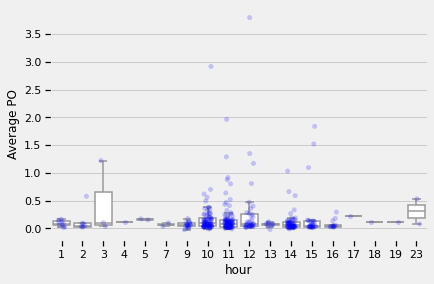

In [14]:
# PO vs. time of day

sns.stripplot(data=data_drop_na, x='hour', y='Average PO', jitter=0.2, alpha=0.2, color='blue')
sns.boxplot(data=data_drop_na, x='hour', y='Average PO', showfliers = False, color='white')

<AxesSubplot:xlabel='Temperature (C )'>

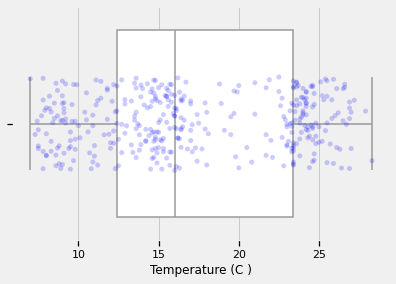

In [15]:
# Temperature

sns.stripplot(data_drop_na['Temperature (C )'], jitter=0.2, alpha=0.2, color='blue')
sns.boxplot(data_drop_na['Temperature (C )'], showfliers = False, color='white')

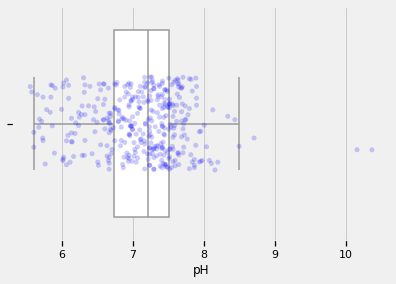

In [16]:
# PH

sns.stripplot(data_drop_na['pH'], jitter=0.2, alpha=0.2, color='blue')
sns.boxplot(data_drop_na['pH'], showfliers = False, color='white')

data_drop_na = data_drop_na[data_drop_na['pH']<=8.5]

<AxesSubplot:xlabel='Conductivity (uS/cm)'>

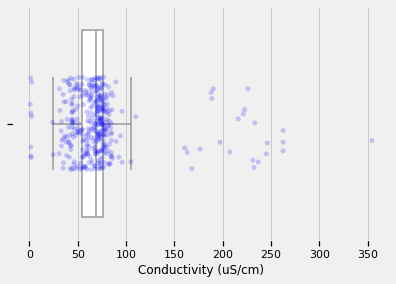

In [17]:
# Conductivity

sns.stripplot(data_drop_na['Conductivity (uS/cm)'], jitter=0.2, alpha=0.2, color='blue')
sns.boxplot(data_drop_na['Conductivity (uS/cm)'], showfliers = False, color='white')

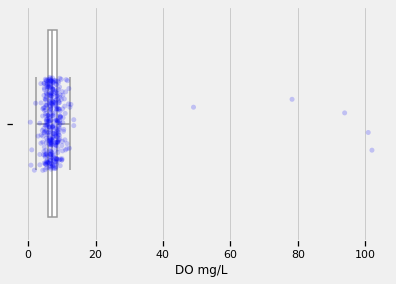

In [18]:
# DO

sns.stripplot(data_drop_na['DO mg/L'], jitter=0.2, alpha=0.2, color='blue')
sns.boxplot(data_drop_na['DO mg/L'], showfliers = False, color='white')

data_drop_na = data_drop_na[data_drop_na['DO mg/L'] <= 20]

<AxesSubplot:xlabel='DO %'>

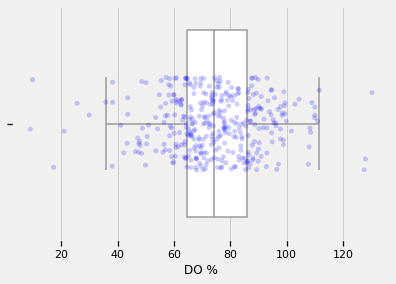

In [19]:
# DO %

sns.stripplot(data_drop_na['DO %'], jitter=0.2, alpha=0.2, color='blue')
sns.boxplot(data_drop_na['DO %'], showfliers = False, color='white')

<AxesSubplot:xlabel='Average PO'>

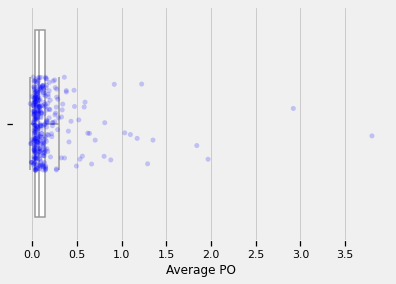

In [20]:
# PO

sns.stripplot(data_drop_na['Average PO'], jitter=0.2, alpha=0.2, color='blue')
sns.boxplot(data_drop_na['Average PO'], showfliers = False, color='white')

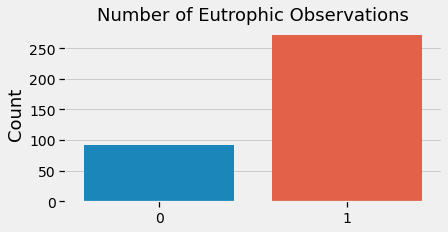

In [21]:
# Eutrophication Split

plt.figure(figsize=(6, 3))
plt.title('Number of Eutrophic Observations', fontsize=18)
ax = sns.countplot(x='Eutro', data=data_drop_na)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
plt.show()

# Split data

In [22]:
from sklearn.model_selection import train_test_split
train, valntest = train_test_split(data_drop_na, train_size=0.7, test_size=0.3, random_state=0, stratify=data_drop_na['Eutro'])
val, test = train_test_split(valntest, train_size=0.5, test_size=0.5, random_state=0, stratify=valntest['Eutro'])

print('Train:', train.shape, 'Validation:', val.shape, 'Test:', test.shape)
print('Train eutrophication proportion: {:.2f} %'.format(train['Eutro'][train['Eutro'] == 1].shape[0] / train.shape[0] * 100))
print('Validation eutrophication proportion: {:.2f} %'.format(val['Eutro'][val['Eutro'] == 1].shape[0] / val.shape[0] * 100))
print('Test eutrophication proportion: {:.2f} %'.format(test['Eutro'][test['Eutro'] == 1].shape[0] / test.shape[0] * 100))

Train: (254, 15) Validation: (55, 15) Test: (55, 15)
Train eutrophication proportion: 74.80 %
Validation eutrophication proportion: 74.55 %
Test eutrophication proportion: 74.55 %


In [23]:
train.columns

Index(['Location', 'Temperature (C )', 'pH', 'Conductivity (uS/cm)', 'DO mg/L',
       'DO %', 'Average PO', 'Time', 'year', 'month', 'day', 'hour', 'minutes',
       'Description', 'Eutro'],
      dtype='object')

# Add Features

In [24]:
# Distinguish Well samples from open water samples

train['Well_sample'] = train['Location'].apply(lambda x: 1 if 'well' in x else 0)
val['Well_sample'] = val['Location'].apply(lambda x: 1 if 'well' in x else 0)
test['Well_sample'] = test['Location'].apply(lambda x: 1 if 'well' in x else 0)

In [25]:
# Samples taken after going through the sewage treatment plant

locs = ['camp creek (weir)', 'camp creek (bridge)', 'camp creek (outflow)',
        'shoreline', 'well #3', 'well #4']

train['After_treatment'] = train['Location'].apply(lambda x: 1 if any(i in x for i in locs) else 0)
val['After_treatment'] = val['Location'].apply(lambda x: 1 if any(i in x for i in locs) else 0)
test['After_treatment'] = test['Location'].apply(lambda x: 1 if any(i in x for i in locs) else 0)

In [26]:
# Samples taken before lunch and after dinner

train['before_lunch'] = ((train['hour'] <= 12) & (train['hour'] >= 6)).astype(int)
train['after_dinner'] = ((train['hour'] < 6) | (train['hour'] > 17)).astype(int)
val['before_lunch'] = ((val['hour'] <= 12) & (val['hour'] >= 6)).astype(int)
val['after_dinner'] = ((val['hour'] < 6) | (val['hour'] > 17)).astype(int)
test['before_lunch'] = ((test['hour'] <= 12) & (test['hour'] >= 6)).astype(int)
test['after_dinner'] = ((test['hour'] < 6) | (test['hour'] > 17)).astype(int)

In [27]:
# Samples taken during different rotations

train['rotation_#1'] = (train['day'] <= 10).astype(int)
train['rotation_#3'] = (train['day'] > 20).astype(int)
val['rotation_#1'] = (val['day'] <= 10).astype(int)
val['rotation_#3'] = (val['day'] > 20).astype(int)
test['rotation_#1'] = (test['day'] <= 10).astype(int)
test['rotation_#3'] = (test['day'] > 20).astype(int)

In [28]:
train.columns

Index(['Location', 'Temperature (C )', 'pH', 'Conductivity (uS/cm)', 'DO mg/L',
       'DO %', 'Average PO', 'Time', 'year', 'month', 'day', 'hour', 'minutes',
       'Description', 'Eutro', 'Well_sample', 'After_treatment',
       'before_lunch', 'after_dinner', 'rotation_#1', 'rotation_#3'],
      dtype='object')

In [29]:
from sklearn.preprocessing import StandardScaler
num_features = ['Temperature (C )', 'pH', 'Conductivity (uS/cm)', 'DO mg/L',
                'DO %', 'Average PO'] 
               

cat_features =  ['Description', 'Well_sample', 'After_treatment',
       'before_lunch', 'after_dinner', 'rotation_#1', 'rotation_#3']

droppies = [] #features to drop later


# Fit scaler for the training data
scaler = StandardScaler()
scaler.fit(train[num_features])

def create_features(df, droppies):

    scaled = df[num_features].copy()
    
    # Convert numeric features to standard units
    scaled.iloc[:, :] = scaler.transform(scaled) 
    
    # Convert categorical features using dummy encoding
    cat = pd.Series(cat_features, dtype=pd.CategoricalDtype(categories=cat_features))
    categoricals = [pd.get_dummies(df[s], prefix=s, drop_first=True) for s in cat_features]
    
    return pd.concat([scaled] + categoricals, axis=1).drop(droppies, axis=1)

# Let's test our function
create_features(train, droppies)

,Temperature (C ),pH,Conductivity (uS/cm),DO mg/L,DO %,Average PO,Description_rain,Description_sunny,Well_sample_1,After_treatment_1,before_lunch_1,after_dinner_1,rotation_#1_1,rotation_#3_1
333,-1.262532,-2.388141,-1.540938,0.954615,0.289531,0.264086,0,0,1,0,1,0,0,0
412,-0.537984,-1.994651,1.851747,-2.473111,-2.947044,0.360492,1,0,1,1,1,0,0,1
13,1.042847,1.497573,-0.053442,-0.135331,0.397040,-0.278200,1,0,0,1,1,0,1,0
385,-1.246065,-0.141969,-0.211142,0.791632,0.142414,-0.266149,0,1,0,0,1,0,0,1
350,-1.196664,-0.846972,2.631723,-1.281301,-1.747474,-0.338454,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-1.180197,-0.912553,-0.714077,1.290766,0.674299,3.569015,0,0,1,0,1,0,0,0
376,-0.389781,0.300707,0.065899,0.109143,0.074514,-0.127565,0,1,0,1,1,0,0,0
322,-0.784989,0.021985,-0.209011,0.216100,-0.168795,-0.458962,0,0,0,0,1,0,0,0
31,-0.290979,-0.289528,-0.262288,0.058211,-0.004703,-0.136603,1,0,0,0,1,0,1,0


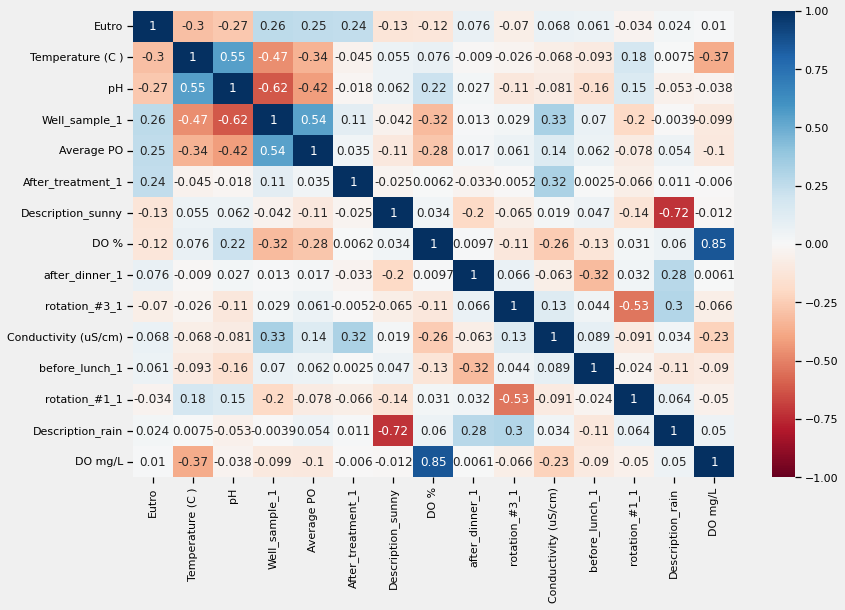

In [30]:
def plot_corr_matrix(train, target, n):
    
    """
    Returns the correlation matrix for the top n correlated predictors with the target variable.
    """
    
    cols = train.corr().abs().nlargest(n, target)[target].index
    k_corr_matrix=train[cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(k_corr_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
    
    return

train_corr = create_features(train, droppies)
train_corr['Eutro'] = train['Eutro']
plot_corr_matrix(train=train_corr, target='Eutro', n=30)

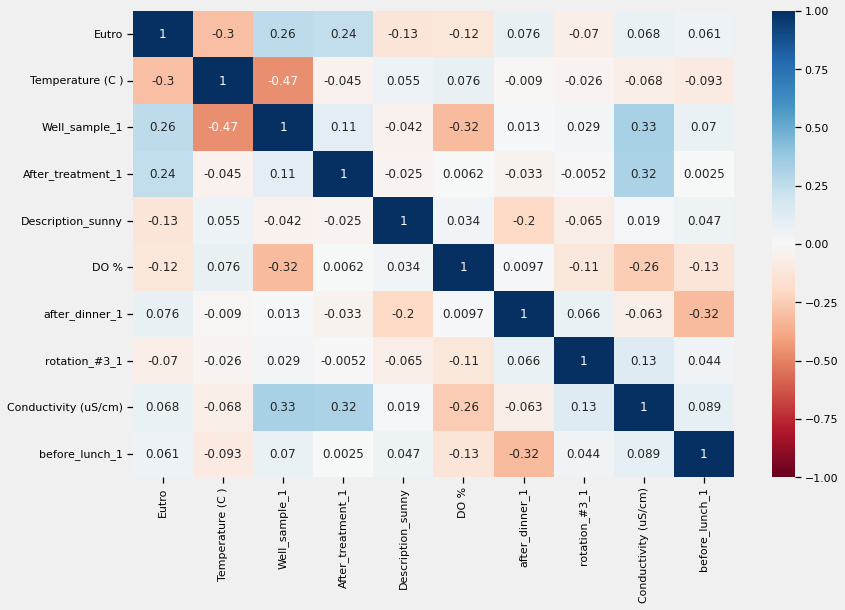

In [31]:
## hold one feature in every bundle of highly correlated features (for corr over 0.5)

droppies = ['pH', 'DO mg/L', 'Description_rain','Average PO', 'rotation_#1_1']

train_corr = create_features(train, droppies)

# test again
train_corr['Eutro']=train['Eutro']
plot_corr_matrix(train=train_corr, target='Eutro', n=20)

# Train Model

In [32]:
def cv_select_best_features(model, X_train, y_train, k, n):

    """
    Returns a the best set of features with cross validation. 
    n=number of Kfold splits
    k=number of features to hold
    """

    five_fold = KFold(n_splits=n)
    f1_scores = []
    col_list = []
    
    # Iterature thought cv-folds
    for train_index, val_index in five_fold.split(X_train):
    
        # Select the 5 best features from X, y
        select = SelectKBest(f_classif, k=k).fit(X_train.iloc[train_index, :], 
                                        y_train.iloc[train_index])
    
        # Create reduced Feature set
        X_new = X_train.loc[:, select.get_support()]
        col_list.append(X_new.columns.tolist())

        # Fit model
        model.fit(X_new.iloc[train_index, :], 
                  y_train.iloc[train_index])

        # Append accuracy scores
        f1_scores.append(
            f1_score(y_train.iloc[val_index], 
                           model.predict(X_new.iloc[val_index, :])))
    return f1_scores, col_list

def plot_folds(n, f1_scores):
    
    """
    Returns a plot, comparing the f1_scores of the n folds calculated in cv_select_best_features.
    """
    
    #labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

    x = np.arange(n)  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    ax.bar(x, f1_scores, width)
    ax.plot([x[0]-width/2, x[-1]+width/2], [np.mean(f1_scores), np.mean(f1_scores)], lw=4, color='#fc4f30', label='Mean F1 score\n{}'.format(np.mean(f1_scores)))
    ax.set_ylabel('f1_score', fontsize=16)
    ax.set_ylim([0, 1.])
    ax.set_title('f1_score for each cross-validation fold', fontsize=14)
    ax.set_xticks(x)
    #ax.set_xticklabels(labels, fontsize=14)
    ax.legend(frameon=False);
    
    return

[['Temperature (C )',
  'DO %',
  'Description_sunny',
  'Well_sample_1',
  'After_treatment_1'],
 ['Temperature (C )',
  'DO %',
  'Well_sample_1',
  'After_treatment_1',
  'after_dinner_1'],
 ['Temperature (C )',
  'DO %',
  'Description_sunny',
  'Well_sample_1',
  'After_treatment_1'],
 ['Temperature (C )',
  'Conductivity (uS/cm)',
  'Description_sunny',
  'Well_sample_1',
  'After_treatment_1'],
 ['Temperature (C )',
  'DO %',
  'Description_sunny',
  'Well_sample_1',
  'After_treatment_1']]

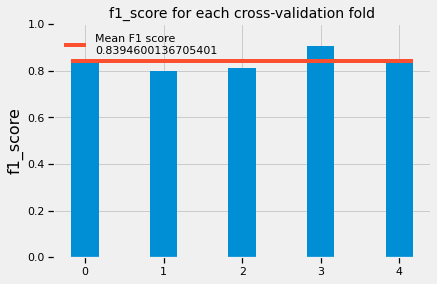

In [33]:
X_train = create_features(train, droppies)
y_train = train[['Eutro']]

# Setup
model = LogisticRegression(penalty='none', fit_intercept=True)
model_cv_results = cv_select_best_features(model, X_train, y_train, k=5, n=5)
plot_folds(n=5, f1_scores=model_cv_results[0])
model_cv_results[1]

# Model Tuning

In [34]:
def rand_search(features, n, model, val, y_val):
    
    
    cv = KFold(n_splits=5)

    param_distributions = {'penalty': ('l1', 'l2', 'none'),
                           'fit_intercept': (True, False),
                           'C' : loguniform(1e-3, 1e2), 
                           'class_weight': (None, 'balanced')}

    gs = RandomizedSearchCV(estimator=model, 
                            param_distributions=param_distributions, 
                            n_iter=72,
                            scoring='precision',
                            cv=cv)

    gs.fit(create_features(val, droppies)[features], val['Eutro'])
    
    df = pd.DataFrame(gs.cv_results_).sort_values('mean_test_score', 
                                               ascending=False).reset_index(drop=True)
    
    return df

In [35]:
## Random Search

features =  ['Temperature (C )',
  'Description_sunny',
  'Well_sample_1',
  'After_treatment_1',
  'rotation_#3_1']

X_train = create_features(train, droppies)[features]
y_train = train['Eutro']

model.fit(X_train, y_train)

df = rand_search(features=features, n=5, model=model, val=val, y_val=val['Eutro'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_fit_intercept,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005077,0.001010,0.000411,0.000821,95.033152,balanced,False,none,"{'C': 95.03315172842834, 'class_weight': 'bala...",0.833333,1.0,0.75,0.875,0.571429,0.805952,0.14234,1
1,0.005048,0.000003,0.000910,0.001819,0.523932,balanced,False,none,"{'C': 0.5239324538748027, 'class_weight': 'bal...",0.833333,1.0,0.75,0.875,0.571429,0.805952,0.14234,1
2,0.005177,0.003071,0.002136,0.002403,0.202952,balanced,False,none,"{'C': 0.20295173310759992, 'class_weight': 'ba...",0.833333,1.0,0.75,0.875,0.571429,0.805952,0.14234,1
3,0.005664,0.001202,0.001732,0.001591,0.01387,balanced,False,none,"{'C': 0.013870471561167217, 'class_weight': 'b...",0.833333,1.0,0.75,0.875,0.571429,0.805952,0.14234,1
4,0.006631,0.001099,0.000509,0.001019,3.716614,balanced,True,none,"{'C': 3.716613883574001, 'class_weight': 'bala...",0.833333,1.0,0.75,0.875,0.571429,0.805952,0.14234,1


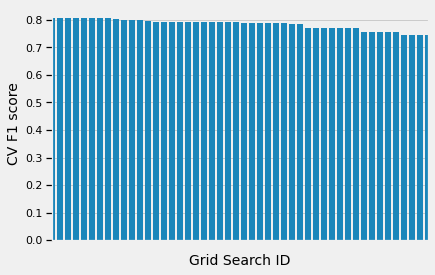

In [36]:
# plot the random search

ax = sns.barplot(x=df.index, y='mean_test_score', data=df, color='#008fd5')
ax.axes.xaxis.set_ticklabels([])
plt.tick_params(bottom=False)
ax.set_xlabel('Grid Search ID', fontsize=14)
ax.set_ylabel('CV F1 score', fontsize=14)
ax.set_xlim([0, 47]);

df.iloc[0:5]

In [37]:
## Tune threshold

def f1_threshold(y_true, y_pred_proba, threshold):
    
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    return f1_score(y_true, y_pred)



def find_f1_threshold(X, y, model):

    # Create threshold array
    thresholds = np.arange(0, 1, 0.01)
    
    # Compute F1 scores for each threshold
    f1_scores = np.array([f1_threshold(y.values.flatten(), model.predict_proba(X)[:, 1], threshold) 
                          for threshold in np.arange(0, 1, 0.01)])
    
    # Get finite values
    thresholds = thresholds[np.isfinite(f1_scores)]
    f1_scores = f1_scores[np.isfinite(f1_scores)]
    
    # Optimal values
    idx = np.argmax(f1_scores)
    f1_score = f1_scores[idx]
    threshold = thresholds[idx]
    
    return threshold

In [38]:
# extract the optimal threshold

model = LogisticRegression(penalty='none', fit_intercept= True, class_weight= 'balanced', C=0.003109)
model.fit(X_train, y_train)

opt_threshold = find_f1_threshold(create_features(val, droppies)[features], val['Eutro'], model)
print('the optimal threshold is:', opt_threshold)

the optimal threshold is: 0.15


In [39]:
# train the desired model on training using the hyperparameters obtained
y_pred_proba = model.predict_proba(create_features(test, droppies)[features])[:, 1]

# test the model on the test set (the one from the raw_train)
print('f1_score on test dataset:', f1_threshold(test['Eutro'], y_pred_proba, opt_threshold))

f1_score on test dataset: 0.8817204301075269
